# TensorFlow Version Check

In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1


# Tensorflow 语法

```
tensorflow的本质:
                tensor(data)数据
                op(operation)赋值,运算等操作
                graphs 数据操作
                session 运行器
```

In [9]:

import tensorflow as tf
data1 = tf.constant(2,dtype=tf.int32)
data2 = tf.Variable(10,name='var')# 变量可以保存值的weights 和 biases 在整个session中; 需要被init
#print(data1, data2)


# sess = tf.Session()
# print(sess.run(data1))
# init = tf.global_variables_initializer()
# sess.run(init)
# print(sess.run(data2)) # before using variable need to init first
# sess.close()


# 这种方法不需要close sess
init = tf.global_variables_initializer()
sess = tf.Session()
with sess:
    sess.run(init) # before using variable need to init first
    print(sess.run(data1))
    print(sess.run(data2))


2
10


# 常量运算

In [7]:

import tensorflow as tf
data1 = tf.constant(6)
data2 = tf.constant(2)
addition = data1+data2 # equal tf.add(data1,data2)
subtract = data1-data2 # equal tf.subtract(data1,data2)
multiply = data1*data2 # equal tf.multiply(data1,data2)
division = data1/data2 # equal tf.divide(data1,data2)

with tf.Session() as sess:
    print(sess.run(addition))
    print(sess.run(subtract))
    print(sess.run(multiply))
    print(sess.run(division))
print('end!')


8
4
12
3.0
end!


# 常量与变量运算

In [20]:

import tensorflow as tf
data1 = tf.constant(6)
data2 = tf.Variable(2) 
addition = tf.add(data1,data2)
data_copy = tf.assign(data2,addition) # addition -> data2 data2 = addition
subtract = tf.subtract(data1,data2)
multiply = tf.multiply(data1,data2)
division = tf.divide(data1,data2)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(addition))
    print(sess.run(subtract))
    print(sess.run(multiply))
    print(sess.run(division))
    print('sess.run(data_copy) ', sess.run(data_copy)) #8->data2  datacopy = 
    print('data_copy.eval() ',data_copy.eval())# same meaning with below, the reason 
    print('tf.get_default_sesson()', tf.get_default_session().run(data_copy))
print('end!')



8
4
12
3.0
sess.run(data_copy)  8
data_copy.eval()  14
tf.get_default_sesson() 20
end!


# tensorflor.placeholder 的运用

```
placeholder is initially empty and are used to feed in the actual training examples.
need a declared expect data type  with an optional shape argument
```

In [21]:
import tensorflow as tf
data1 = tf.placeholder(tf.float32) # a placeholder for a tensor(data) that will be always fed.
data2 = tf.placeholder(tf.float32)
addition= tf.add(data1,data2)

with tf.Session() as sess:
    
    print(sess.run(addition,feed_dict={data1:6,data2:2}))
print('end!')



8.0
end!


# Tensorflow 矩阵运算

In [13]:

import tensorflow as tf

data1 = tf.constant([[6,6]])
print('data1.shape: ',data1.shape)
data2 = tf.constant([[2],[1]]) # (2,1)
data3 = tf.constant([[3,3]]) #(1,2)
data4 = tf.constant([[1,2],[3,4],[5,6]]) #(3,2)

matMul = tf.matmul(data1,data2)
matMul2 = tf.multiply(data1,data2)
matAdd = tf.add(data1,data3)
with tf.Session() as sess:
    print('data1 * data2:\n',sess.run(matMul))
    print('data1 + data3:\n', sess.run(matAdd))
    print('data1 x data2:\n',sess.run(matMul2)) 
    


data1.shape:  (1, 2)
data1 * data2:
 [[18]]
data1 + data3:
 [[9 9]]
data1 x data2:
 [[12 12]
 [ 6  6]]
[[12 12]
 [ 6  6]]


# Tensorflow特殊矩阵

In [37]:
import tensorflow as tf
mat0 = tf.zeros([2,3])# 零矩阵
mat1 = tf.ones([3,2])# 单位矩阵
mat_fill = tf.fill([2,3],15) #填充矩阵
with tf.Session() as sess:
    print(sess.run(mat0))
    print(sess.run(mat1))
    print(sess.run(mat_fill))
    
    

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[15 15 15]
 [15 15 15]]


In [16]:
import tensorflow as tf
matA = tf.constant([[2],[3],[4]])
matB = tf.zeros_like(matA) #复制一个同样维度的零矩阵
matC = tf.linspace(0.0,2.0,11)
matD = tf.random_uniform([2,3],-1,2)# 2x3 的随机矩阵,随机范围是(-1,2)
with tf.Session() as sess:
    #print(sess.run(matA))
    print("matB: \n",sess.run(matB))
    print("matC: \n",sess.run(matC))
    print("matD: \n",sess.run(matD))
    
    

matB: 
 [[0]
 [0]
 [0]]
matC: 
 [0.        0.2       0.4       0.6       0.8       1.        1.2
 1.4       1.6       1.8000001 2.       ]
matD: 
 [[-0.4354236   1.1412733  -0.238724  ]
 [ 0.64117324 -0.32113397  1.0433965 ]]


 # tensorflow default graph 运用

In [27]:
print(tf.get_default_graph()) 

g = tf.Graph()
print(g)

graph_one = tf.get_default_graph()
print(graph_one)

graph_two = tf.Graph()
print(graph_two)

with graph_two.as_default():
    print(graph_two is tf.get_default_graph())
    print(graph_two)
    
    

True


# Example Neural Network

In [31]:
import numpy as np
import tensorflow as tf

n_features = 10
n_neurons = 3

x=tf.placeholder(tf.float32,(None,n_features))

w = tf.Variable(tf.random_normal([n_features,n_neurons]))
b = tf.Variable(tf.ones([n_neurons]))

xw = tf.matmul(x,w)
z = xw+b
a = tf.sigmoid(z)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict ={x:np.random.random([1,n_features])})
print(layer_out)

[[0.22063856 0.45406836 0.13621013]]


# Simple Regression Example

[0.01166648 1.22274125 0.86289463 4.17866219 3.60422373 6.4532943
 5.58784619 7.60735309 8.75478692 9.44830171]


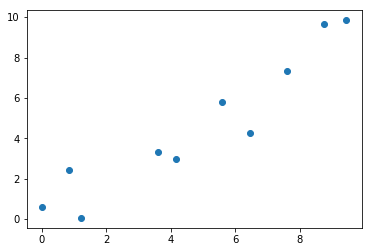

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
print(x_data)
y_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

plt.plot(x_data,y_data,'o')


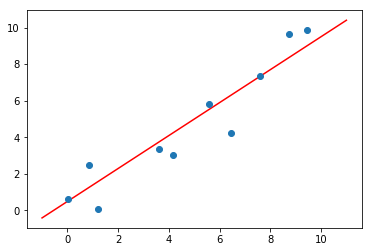

In [51]:
#y = mx + b
#np.random.rand(2)

m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))

error = 0

for x,y in zip(x_data,y_data):
    y_hat = m*x+b
    error+=(y-y_hat)**2
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)
init  = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

x_test = np.linspace(-1,11,10)

# y = mx+b
y_pred_plot = final_slope*x_test+final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_data,'o')



# Tensorflow Regression Example

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

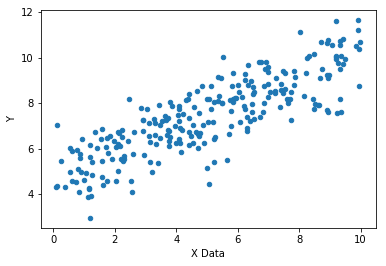

In [70]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data)) # random add some noise to make data not straight

# y = mx+b
# b = 5
y_true = (0.5 * x_data)+ 5 +noise

x_df = pd.DataFrame(data=x_data, columns = ['X Data'])
y_df = pd.DataFrame(data=y_true, columns = ['Y'])

pd.DataFrame()
my_data = pd.concat([x_df,y_df],axis = 1)
my_data.sample(n=250).plot(kind='scatter',x='X Data',y = 'Y')# 250 random samples


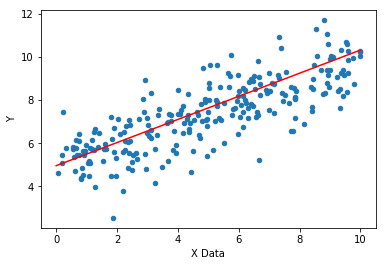

In [90]:
batch_size = 8

m = tf.Variable(.81)
b = tf.Variable(.17)
init = tf.global_variables_initializer()

# x y placeholder
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

y_model = m*xph +b
error = tf.reduce_sum(tf.square(yph-y_model))

#GradientDescentOptimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

# run session
with tf.Session() as sess:
    sess.run(init)
    bactches = 1000
    
    for i in range(bactches):
        rand_index = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_index],yph:y_true[rand_index]}
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

y_pred = x_data*model_m+model_b

my_data.sample(n=250).plot(kind='scatter',x='X Data',y = 'Y')# 250 random samples
plt.plot(x_data,y_pred,'r');